<a href="https://colab.research.google.com/github/AmirNBA9/Binance.API.Csharp.Client/blob/master/KNN_suggestionbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data with seprate columns
users = pd.read_csv('/content/drive/MyDrive/ML/BX-Users.csv', sep=';', on_bad_lines='skip', encoding= 'latin-1')
books = pd.read_csv('/content/drive/MyDrive/ML/BX-Books.csv', sep=';', on_bad_lines='skip', encoding= 'latin-1')
ratings = pd.read_csv("/content/drive/MyDrive/ML/BX-Book-Ratings.csv", sep=';', on_bad_lines='skip', encoding= 'latin-1')

# find and split columns
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users.columns = ['userID', 'Location', 'Age']
ratings.columns = ['userID', 'ISBN', 'bookRating']

print(ratings.shape)
print(list(ratings.columns))

users.info()
books.info()
ratings.info()

<ipython-input-30-6c3a35a10800>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/ML/BX-Books.csv', sep=';', on_bad_lines='skip', encoding= 'latin-1')


(1149780, 3)
['userID', 'ISBN', 'bookRating']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null 

**بررسي ديتا**
##كاربرها
- RowCount: 272230 not null data
- Structure: User-ID;"Location";"Age"

##كتاب ها
- RowCount: 228148 not null data
- Structure: ISBN;"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L"

##امتيازات كتاب ها
- RowCount: 1149775 not null record
- Structure: User-ID;"ISBN";"Book-Rating"

# مطالعه بيشتر ديتاها

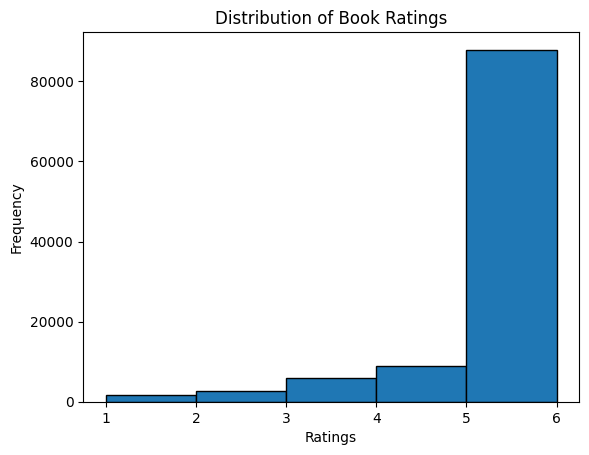

In [31]:
# پلات كردن داده هاي يونيك براي رتبه كتاب ها
# تبدیل داده‌ها به یک DataFrame
df = pd.DataFrame(ratings)

# رسم نمودار توزیع امتیازها
plt.hist(df["bookRating"], bins=[1, 2, 3, 4, 5, 6], edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Book Ratings')
plt.show()


In [32]:
# Join ratings and books dataframes
rating_users = pd.merge(ratings,users,on='ISBN')

# Shape of the data
rating_books.shape

KeyError: ignored

In [ ]:
# Take 1 % data as sample
rating_books_sample = rating_books.sample(frac=.01, random_state=1)

# Shape of the sample data
rating_books_sample.shape

#KNN

In [ ]:
# Import NearestNeighbors
from sklearn.neighbors import NearestNeighbors

# Build NearestNeighbors Object
model_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=7, n_jobs=-1)

# Fit the NearestNeighbor
model_nn.fit(rating_books_pivot)

In [ ]:
# Get top 10 nearest neighbors
indices=model_nn.kneighbors(rating_books_pivot.loc[['10 Secrets for Success and Inner Peace']], 10, return_distance=False)

# Print the recommended books
print("Recommended Books:")
print("==================")
for index, value in enumerate(rating_books_pivot.index[indices][0]):
    print((index+1),". ",value)